<a href="https://colab.research.google.com/github/betr0dalf/MMPZ/blob/main/MMPZ_NovikovDV_prac2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Математическое моделирование прикладных задач
# Практическая работа № 2
# Выполнил студент группы ИНБО-05-22
# Новиков Денис Владиславович

## Модель кредитования


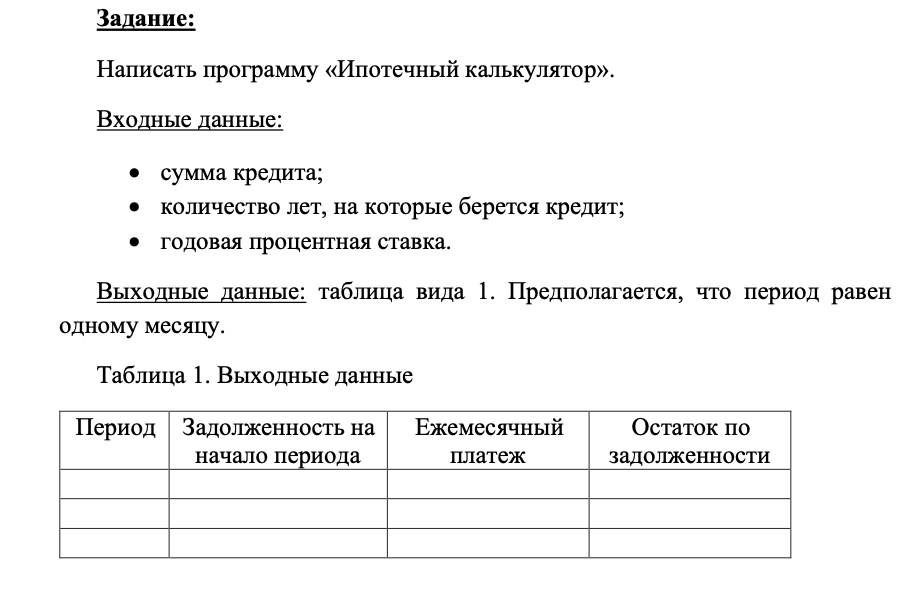

In [ ]:
import pandas as pd
from datetime import datetime


def mortgage_calculator(loan_amount, years, annual_interest_rate):

    monthly_interest_rate = annual_interest_rate / 100 / 12

    total_payments = years * 12
    if monthly_interest_rate == 0:
        monthly_payment = loan_amount / total_payments
    else:
        monthly_payment = loan_amount * monthly_interest_rate / (1 - (1 + monthly_interest_rate) ** -total_payments)

    results = []
    remaining_debt = loan_amount

    date_range = pd.date_range(start=datetime.today(), periods=total_payments, freq='ME')

    for period in range(total_payments):
        interest_payment = remaining_debt * monthly_interest_rate
        principal_payment = monthly_payment - interest_payment
        remaining_debt -= principal_payment

        results.append({
            "Период": date_range[period].date(),
            "Задолженность на начало периода": loan_amount if period == 0 else results[period-1]["Остаток задолженности"],
            "Ежемесячный платеж": monthly_payment,
            "Остаток задолженности": max(0, remaining_debt)
        })

    df = pd.DataFrame(results)
    df = df.round(3)
    return df


print('Ипотечный калькулятор\n')
loan_amount = int(input('Введите сумму кредита: '))
years = int(input('Введите количество лет: '))
annual_interest_rate = int(input('Введите годовую процентную ставку: '))

df_table = mortgage_calculator(loan_amount, years, annual_interest_rate)

display(df_table)

Ипотечный калькулятор

Введите сумму кредита: 1000000
Введите количество лет: 10
Введите годовую процентную ставку: 10


,Период,Задолженность на начало периода,Ежемесячный платеж,Остаток задолженности
0,2025-02-28,1000000.000,13215.074,995118.260
1,2025-03-31,995118.260,13215.074,990195.838
2,2025-04-30,990195.838,13215.074,985232.396
3,2025-05-31,985232.396,13215.074,980227.593
4,2025-06-30,980227.593,13215.074,975181.082
...,...,...,...,...
115,2034-09-30,64455.077,13215.074,51777.129
116,2034-10-31,51777.129,13215.074,38993.531
117,2034-11-30,38993.531,13215.074,26103.404
118,2034-12-31,26103.404,13215.074,13105.858
